<a href="https://colab.research.google.com/github/trsarje/AmazonMusicReview/blob/main/TF_IDF_Vectorize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
import collections

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords  
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import gensim
from gensim.utils import simple_preprocess
import csv
import re

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
ip_data = pd.read_csv("/content/drive/MyDrive/AmazonMusic/data/Music.csv")
data = ip_data.sample(frac=0.01, random_state=0)   # Taking a sample of data to suitable for RAM
data.head()

productId  ... score
3477750  B00006LI4S  ...   5.0
6298848  B00000IAU3  ...   3.0
4109460  B000J234QG  ...   5.0
5651752  B000A29B2Q  ...   4.0
394058   B00001R3N7  ...   5.0

[5 rows x 5 columns]

In [3]:
  lemmatizer = WordNetLemmatizer() 
  ps = PorterStemmer() 

In [4]:
freq_words = ["album", "cd", "would", "get", "wouldnt", "think", "buy", "can", "even", "one", "time", "im","ablum", "id", "ooo", "oo", "el"]

In [5]:
stop_words = set(stopwords.words('english'))  
corpus = []
for i, r in enumerate(data.review):
  r = re.sub(r'[^\w\s]', '', r)
  r = re.sub(r'[0-9]', '', r)
  r = r.split()
  rev = [lemmatizer.lemmatize(w.lower()) for w in r if w.lower() not in stop_words if w.lower() not in freq_words]
  rev = [ps.stem(w) for w in rev]
  sp = " "
  rev = sp.join(rev)
  corpus.append(rev)

In [6]:
corpus[0]

'bought dvd sever month ago never purchas concert video skeptic think like watch coupl time wrong hard predict first second viewinglisten piec music leav last impress posit impress gilmour dvd went bought roger water flesh peter gabriel secret world good dont find come back like gilmour read other describ meltdown concert tast quotunderstatedquot agre time find wish gilmour give littl whether longer solo track that part beauti concert top song select refresh unexpect key point set color light beati done intim first piec shine great way begin subtl teas build start treasur nonclass coupl postwat piec great version barrett materi piec bizet opera richard wright breakthrough beauti done richard thompson piec perform illustr water gilmour complement sens strengthen other weak gilmour seem take peopl music new place product skill guitar work bonu track enjoy often find seek elvi track quotdontquot lieber stoller concert beauti vocal great guitar work take someon el music new place concert h

In [7]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X.shape

(63964, 188107)

In [8]:
type(X[0])

scipy.sparse.csr.csr_matrix

In [9]:
clf = TruncatedSVD(100)
Xpca = clf.fit_transform(X)
type(Xpca)

numpy.ndarray

In [10]:
n = 2
pca = PCA(n_components=n)
pca.fit(Xpca)
transformed = pca.transform(Xpca)
transformed.shape

(63964, 2)

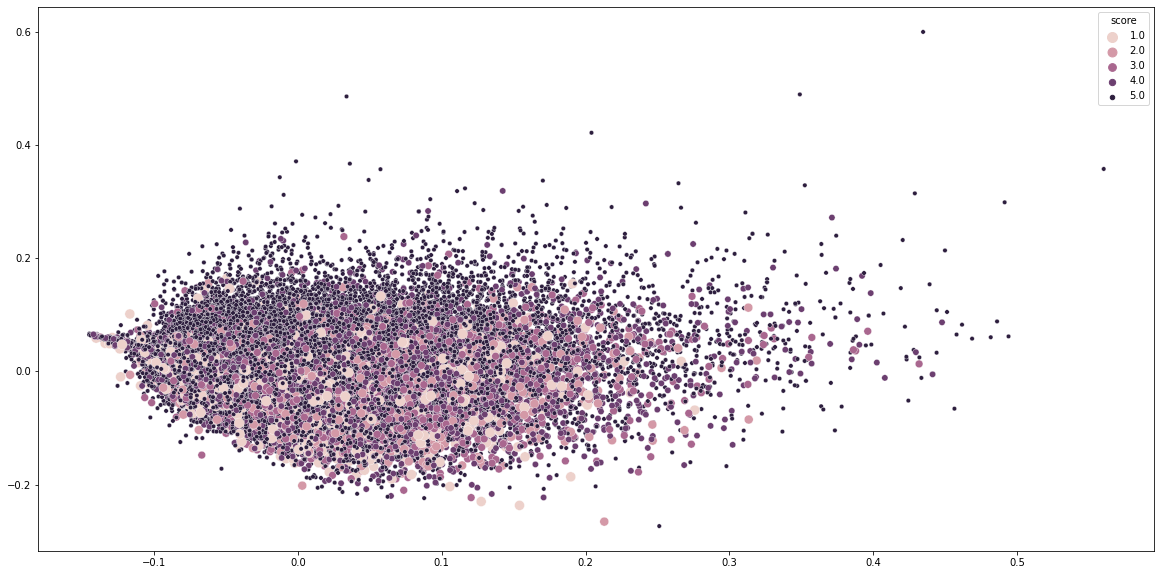

In [11]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=transformed[:,0], y=transformed[:,1],hue=data.score,
                size=data.score,
                sizes=(100,20))
plt.show()

In [12]:
n = 3
pca = PCA(n_components=n)
pca.fit(Xpca)
transformed = pca.transform(Xpca)

In [15]:
fig = px.scatter_3d(x=transformed[:,0], y=transformed[:,1], z= transformed[:,2], color=data.score)
fig.show()